In [1]:
import cdflib

import numpy as np
from  datetime import datetime

from viresclient import set_token
from viresclient import SwarmRequest
set_token(
        "https://vires.services/ows",
        set_default=True,
        token="kmxv5mTTyYwzw4kQ9lsCkGfQHtjjJRVZ",
    )  # key


Token saved for https://vires.services/ows


In [14]:
# Replace 'your_file.cdf' with the path to your CDF file
cdf_file_path = r'C:\Users\1101w\Documents\GitHub\Physics_Work\tracisfolder\SW_OPER_EFICTISH1B_20200329T000000_20200329T235959_0201.cdf'


In [15]:
# Open the CDF file
cdf_data = cdflib.CDF(cdf_file_path)
given_datetime_1_long = datetime(2020, 3, 29, 7, 30, 0)
given_datetime_2_long = datetime(2020, 3, 29, 7, 45, 0)
given_datetime_1_short = datetime(2020, 3, 29, 7, 38, 0)
given_datetime_2_short = datetime(2020, 3, 29, 7, 40, 0)

In [16]:

cdf_info = cdf_data.cdf_info()
print(cdf_info)

CDFInfo(CDF=WindowsPath('C:/Users/1101w/Documents/GitHub/Physics_Work/tracisfolder/SW_OPER_EFICTISH1B_20200329T000000_20200329T235959_0201.cdf'), Version='3.8.1', Encoding=6, Majority='Row_major', rVariables=[], zVariables=['Timestamp', 'Latitude', 'Longitude', 'Radius', 'TII_imaging_mode', 'V_MCP_Setting_H', 'V_MCP_Setting_V', 'V_Phos_Setting_H', 'V_Phos_Setting_V', 'V_Bias_Setting_H', 'V_Bias_Setting_V', 'Column_sum_spectrum_H', 'Column_sum_spectrum_V', 'Column_sum_energies_H', 'Column_sum_energies_V'], Attributes=[{'Project': 'Global'}, {'Mission_group': 'Global'}, {'TITLE': 'Global'}, {'PI_name': 'Global'}, {'PI_affiliation': 'Global'}, {'Acknowledgement': 'Global'}, {'Software_version': 'Global'}, {'MODS': 'Global'}, {'File_Name': 'Global'}, {'List_Of_Input_Files': 'Global'}, {'Logical_source_description': 'Global'}, {'Source_name': 'Global'}, {'Data_type': 'Global'}, {'Data_version': 'Global'}, {'Descriptor': 'Global'}, {'Discipline': 'Global'}, {'Generated_by': 'Global'}, {'Gene

In [17]:

timestamp_data = cdf_data.varget('Timestamp')
readable_date = cdflib.cdfepoch.to_datetime(timestamp_data)
Spec_H = cdf_data.varget('Column_sum_spectrum_H')
Erg_V = cdf_data.varget('Column_sum_energies_V')
Spec_V = cdf_data.varget('Column_sum_spectrum_V')

In [18]:
readable_date

array(['2020-03-29T00:00:00.000000', '2020-03-29T00:00:00.500000',
       '2020-03-29T00:00:01.000000', ..., '2020-03-29T23:59:59.000000',
       '2020-03-29T23:59:59.500000', '2020-03-30T00:00:00.000000'],
      dtype='datetime64[us]')

In [19]:
print(np.shape(Spec_H))

(172803, 32)


In [20]:
import matplotlib.pyplot as plt

In [21]:
# Given Python datetime objects (replace with actual values)
readable_dates = [dt if isinstance(dt, datetime) else dt.astype(datetime) for dt in readable_date]

# Function to find the closest index
def find_closest_index(datetime_list, target_datetime):
    time_deltas = np.abs(np.array([(dt - target_datetime).total_seconds() for dt in datetime_list]))
    return np.argmin(time_deltas)

# Find the closest indices
closest_index_1 = find_closest_index(readable_dates, given_datetime_1_long)
closest_index_2 = find_closest_index(readable_dates, given_datetime_2_long)

start_index = min(closest_index_1, closest_index_2)
end_index = max(closest_index_1, closest_index_2)
indices_range = np.arange(start_index, end_index + 1)
print(indices_range)

[53994 53995 53996 ... 55792 55793 55794]


In [22]:
readable_dates = np.array(readable_dates)[indices_range]

(1801,) (172803, 32) (1801, 32)


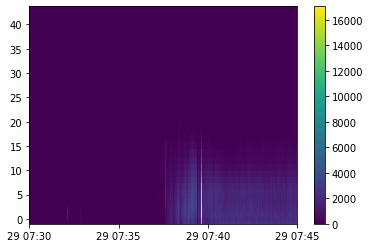

In [23]:
print(np.shape(readable_dates), np.shape(Erg_V), np.shape(Spec_H[indices_range]))
plt.pcolormesh(readable_dates, Erg_V[start_index, :], Spec_V[indices_range].T)
plt.colorbar()

In [24]:
positions_above_5 = np.where(Erg_V[start_index, :] > 5)[0]
positions_below_5 = np.where(Erg_V[start_index, :] < 4)[0]
print(np.shape(Spec_V))

(172803, 32)


(22,)
(22, 1801)


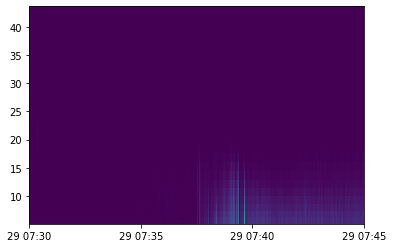

In [25]:
print(np.shape(Erg_V[start_index, positions_above_5]))
print(np.shape(Spec_V[indices_range].T[positions_above_5]))
plt.pcolormesh(readable_dates, Erg_V[start_index, positions_above_5], Spec_V[indices_range].T[positions_above_5])

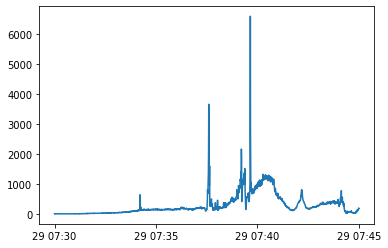

In [26]:
plt.plot(readable_dates, np.mean(Spec_H[indices_range].T[positions_above_5], axis=0))

In [27]:
tct_vars = [
    # Satellite velocity in NEC frame
    "VsatC", "VsatE", "VsatN",
    # Geomagnetic field components derived from 1Hz product
    #  (in satellite-track coordinates)
    "Bx", "By", "Bz",
    # Electric field components derived from -VxB with along-track ion drift
    #  (in satellite-track coordinates)
    # Eh: derived from horizontal sensor
    # Ev: derived from vertical sensor
    "Ehx", "Ehy", "Ehz",
    "Evx", "Evy", "Evz",
    # Ion drift corotation signal, removed from ion drift & electric field
    #  (in satellite-track coordinates)
    "Vicrx", "Vicry", "Vicrz",
    # Ion drifts along-track from vertical (..v) and horizontal (..h) TII sensor
    "Vixv", "Vixh",
    # Ion drifts cross-track (y from horizontal sensor, z from vertical sensor)
    #  (in satellite-track coordinates)
    "Viy", "Viz",
    # Random error estimates for the above
    #  (Negative value indicates no estimate available)
    "Vixv_error", "Vixh_error", "Viy_error", "Viz_error",
    # Quasi-dipole magnetic latitude and local time
    #  redundant with VirES auxiliaries, QDLat & MLT
    "Latitude_QD", "MLT_QD",
    # Refer to release notes link above for details:
    "Calibration_flags", "Quality_flags",
]

In [28]:


SERVER_URL = 'https://vires.services/ows'
request = SwarmRequest(SERVER_URL)
request.set_collection("SW_EXPT_EFIA_TCT02")
request.set_products(measurements=tct_vars)
data = request.get_between(given_datetime_1_short, given_datetime_2_short)
df_A = data.as_dataframe()


Processing:    0%|          |  [ Elapsed: 00:00, Remaining: ? ] [1/1] 

Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (0.293MB)

In [29]:

SERVER_URL = 'https://vires.services/ows'
request = SwarmRequest(SERVER_URL)
request.set_collection("SW_EXPT_EFIC_TCT02")
request.set_products(measurements=tct_vars)
data = request.get_between(given_datetime_1_short, given_datetime_2_short)
df_C = data.as_dataframe()

Processing:    0%|          |  [ Elapsed: 00:00, Remaining: ? ] [1/1] 

Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (0.293MB)

In [30]:
print(df_C)

                               Latitude_QD  Calibration_flags            Bz  \
Timestamp                                                                     
2020-03-29 07:38:00.225250048    65.039124          134219776  45262.578125   
2020-03-29 07:38:00.725250048    65.071678          134219776  45272.039062   
2020-03-29 07:38:01.225250048    65.104233          134219776  45281.789062   
2020-03-29 07:38:01.725250048    65.136795          134219776  45291.757812   
2020-03-29 07:38:02.225250048    65.169350          134219776  45301.699219   
...                                    ...                ...           ...   
2020-03-29 07:39:57.725250048    72.679199          134219776  46953.726562   
2020-03-29 07:39:58.225250048    72.711594          134219776  46958.070312   
2020-03-29 07:39:58.725250048    72.743973          134219776  46962.382812   
2020-03-29 07:39:59.225250048    72.776360          134219776  46966.656250   
2020-03-29 07:39:59.725250048    72.808746          

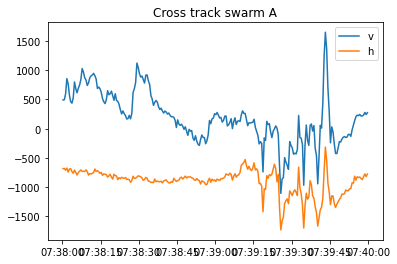

In [31]:
plt.plot(df_A["Vixv"], label='v')
plt.plot(df_A["Vixh"], label='h')
plt.title("Cross track swarm A")
plt.legend()

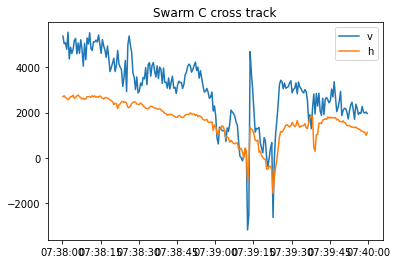

In [32]:
plt.plot(df_C["Vixv"], label='v')
plt.plot(df_C["Vixh"], label='h')
plt.title("Swarm C cross track")
plt.legend()

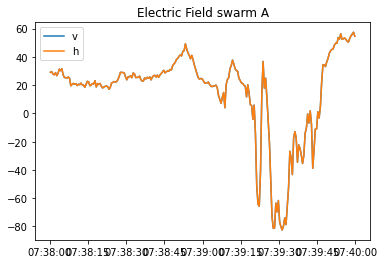

In [33]:
plt.plot(df_A["Ehx"], label='v')
plt.plot(df_A["Evx"], label='h')
plt.title("Electric Field swarm A")
plt.legend()

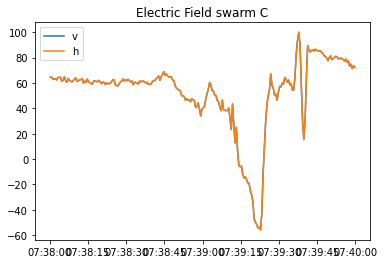

In [34]:
plt.plot(df_C["Ehx"], label='v')
plt.plot(df_C["Evx"], label='h')
plt.title("Electric Field swarm C")
plt.legend()

In [ ]:
plt.plot(df_C["Ehx"], label='v')
plt.plot(df_C["Evx"], label='h')
plt.title("Electric Field swarm C")
plt.legend()

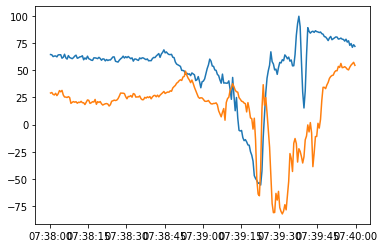

In [35]:
plt.plot(df_C["Evx"], label='h')
plt.plot(df_A["Evx"], label='h')

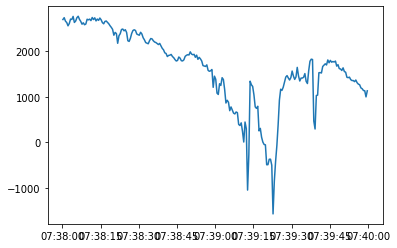

In [36]:
plt.plot(df_C["Vixh"], label='h')

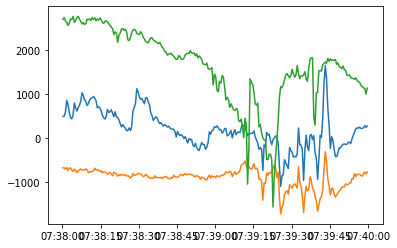

In [37]:
plt.plot(df_A["Vixv"])
plt.plot(df_A["Vixh"])
plt.plot(df_C["Vixh"])